## Breast Cancer Prediction Analysis

### Data Information
The Breast Cancer Wisconsin (Diagnostic) dataset, often referred to as the "WBCD dataset," is a well-known dataset frequently used in machine learning and data mining research. It was originally created by Dr. William H. Wolberg from the University of Wisconsin Hospitals, Madison. The dataset consists of various features derived from digitized images of fine needle aspirate (FNA) of breast masses, along with corresponding diagnostic labels indicating whether the mass is benign or malignant.

Here is a brief description of the attributes in the dataset:

1. ID: Unique identification number for each sample.
2. Diagnosis: The diagnostic label indicating whether the breast mass is benign (B) or malignant (M).
3. Ten real-valued features (columns 3 to 32) computed for each cell nucleus present in the image:
4. Radius (mean of distances from the center to points on the perimeter)
5. Texture (standard deviation of gray-scale values)
6. Perimeter
7. Area
8. Smoothness (local variation in radius lengths)
9. Compactness (perimeter^2 / area - 1.0)
10. Concavity (severity of concave portions of the contour)
11. Concave points (number of concave portions of the contour)
12. Symmetry
13. Fractal dimension ("coastline approximation" - 1)

The goal of using this dataset is typically to develop a predictive model that can accurately classify breast masses as either benign or malignant based on the given features.

### Work Flow
Data collection ---> Data Preprocessing ---> Data Analysis ---> Model Preparation ---> Model Evaluation

In [1]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

### Data Collection

In [2]:
# load the data
breast_cancer = pd.read_csv('data.csv')
print(breast_cancer.shape)
breast_cancer.head()

(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


There are 569 rows and 33 columns present in this dataset

### Data Preprocessing

In [3]:
# get some information on the dataset
breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

There are 31 floating points columns, 1 object datatype column and 1 int data type column. There's also a column with no values at all

In [4]:
# check for missing values
breast_cancer.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

So there are no values in the 'Unnamed:32' column thus we can drop it.

In [5]:
# drop the unnamed:32 and id column since it has no values in it entirely
breast_cancer = breast_cancer.drop(['Unnamed: 32', 'id'], axis=1)

In [6]:
# check columns to see if the unused column has been removed
breast_cancer.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

### Data Analysis

##### performing statistical analysis

In [7]:
# get some statistical info 
breast_cancer.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [8]:
# check the types of cancer
breast_cancer['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

There are two broad types of breast cancer:
   1. Benign
   2. Malignant   
In our dataset, Benign type which is non-cancerous seems to be more prominant than Malignant which is cancerous.

In [9]:
# converting categorical columns
breast_cancer['diagnosis'] = breast_cancer['diagnosis'].replace({'M':0, 'B':1})

In [10]:
# calculate teh correlation matrix
correlation_matrix = breast_cancer.corr()

# set the threshold for correlation
correlation_threshold = 0.5

We have to find the correlation between features and the target variable, i.e. 'diagnosis'

In [11]:
# Find highly correlated features
highly_correlated_features = correlation_matrix[((correlation_matrix > correlation_threshold) | (correlation_matrix < -correlation_threshold)) & (correlation_matrix != 1)]
highly_correlated_features = highly_correlated_features.unstack().dropna().reset_index()

# Print the highly correlated features
print("Highly Correlated Features:")
for index, row in highly_correlated_features.iterrows():
    feature1 = row['level_0']
    feature2 = row['level_1']
    correlation = row[0]
    print(f"{feature1} - {feature2}: {correlation:.2f}")

Highly Correlated Features:
diagnosis - radius_mean: -0.73
diagnosis - perimeter_mean: -0.74
diagnosis - area_mean: -0.71
diagnosis - compactness_mean: -0.60
diagnosis - concavity_mean: -0.70
diagnosis - concave points_mean: -0.78
diagnosis - radius_se: -0.57
diagnosis - perimeter_se: -0.56
diagnosis - area_se: -0.55
diagnosis - radius_worst: -0.78
diagnosis - perimeter_worst: -0.78
diagnosis - area_worst: -0.73
diagnosis - compactness_worst: -0.59
diagnosis - concavity_worst: -0.66
diagnosis - concave points_worst: -0.79
radius_mean - diagnosis: -0.73
radius_mean - perimeter_mean: 1.00
radius_mean - area_mean: 0.99
radius_mean - compactness_mean: 0.51
radius_mean - concavity_mean: 0.68
radius_mean - concave points_mean: 0.82
radius_mean - radius_se: 0.68
radius_mean - perimeter_se: 0.67
radius_mean - area_se: 0.74
radius_mean - radius_worst: 0.97
radius_mean - perimeter_worst: 0.97
radius_mean - area_worst: 0.94
radius_mean - concavity_worst: 0.53
radius_mean - concave points_worst: 0

A lot of features correlate highly either positively or negatively which each other. This can make the handling this challenge cubersome. Let's find out which correlates highly with the target variable 'diagnosis'

In [12]:
# find highly correlated features with diagnosis
highly_correlated_features = np.abs(correlation_matrix['diagnosis']).sort_values(ascending=False)
highly_correlated_features= highly_correlated_features[highly_correlated_features > correlation_threshold]

# print the highly correlated features
print("Highly Correlated Features with Diagnosis: ")
for feature, correlation in highly_correlated_features.iteritems():
    print(f"{feature}: {correlation:.2f}")

Highly Correlated Features with Diagnosis: 
diagnosis: 1.00
concave points_worst: 0.79
perimeter_worst: 0.78
concave points_mean: 0.78
radius_worst: 0.78
perimeter_mean: 0.74
area_worst: 0.73
radius_mean: 0.73
area_mean: 0.71
concavity_mean: 0.70
concavity_worst: 0.66
compactness_mean: 0.60
compactness_worst: 0.59
radius_se: 0.57
perimeter_se: 0.56
area_se: 0.55


There are 15 features out of 33 that highly correlate with the target variable.

###### peforming data visualization

In [13]:
# set the background
sns.set()

In [14]:
# label encoder the category column 'diagnosis' for easy understanding of visualisations
breast_cancer['diagnosis'] = breast_cancer['diagnosis'].replace({0:'M', 1:'B'})

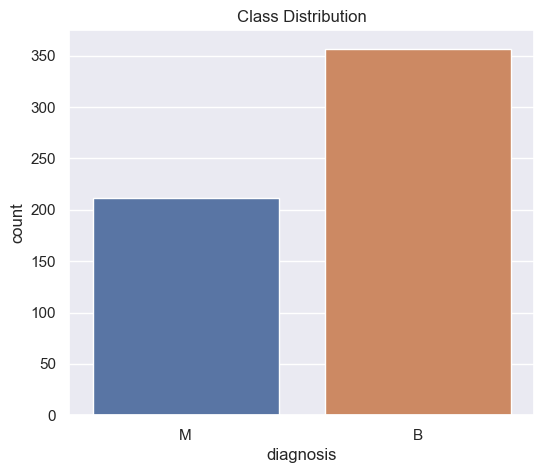

In [15]:
# class distribution
plt.figure(figsize=(6,5))
sns.countplot(x='diagnosis', data=breast_cancer)
plt.title("Class Distribution")
plt.show()

This confirms what we already discovered, Banign patients are more in our dataset of study than Malignant

###### analysis on discrete values of contour

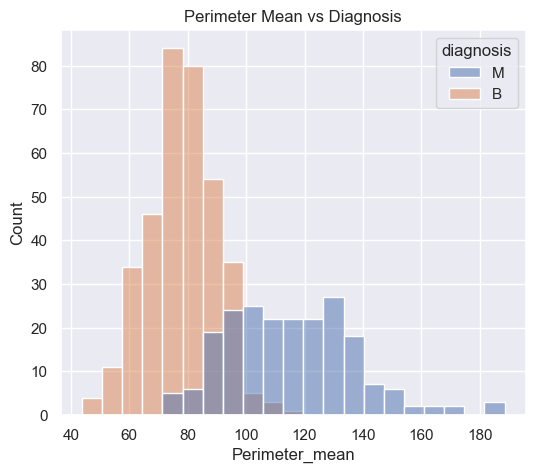

In [16]:
# distribution of diagnosis over perimeter mean
plt.figure(figsize=(6,5))
sns.histplot(data=breast_cancer, x='perimeter_mean', hue='diagnosis')
plt.title("Perimeter Mean vs Diagnosis")
plt.xlabel("Perimeter_mean")
plt.ylabel("Count")
plt.show()

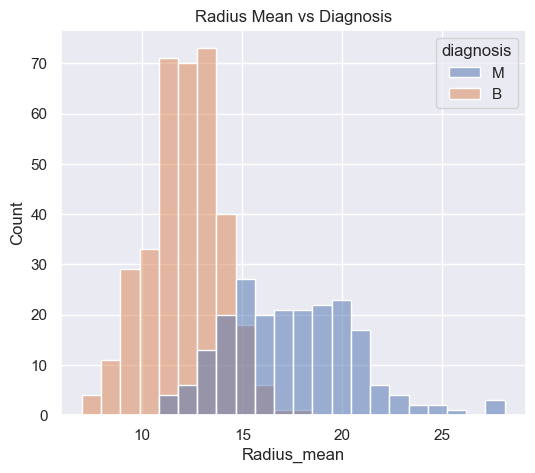

In [17]:
# distribution of diagnosis over radius mean
plt.figure(figsize=(6,5))
sns.histplot(data=breast_cancer, x='radius_mean', hue='diagnosis')
plt.title("Radius Mean vs Diagnosis")
plt.xlabel("Radius_mean")
plt.ylabel("Count")
plt.show()

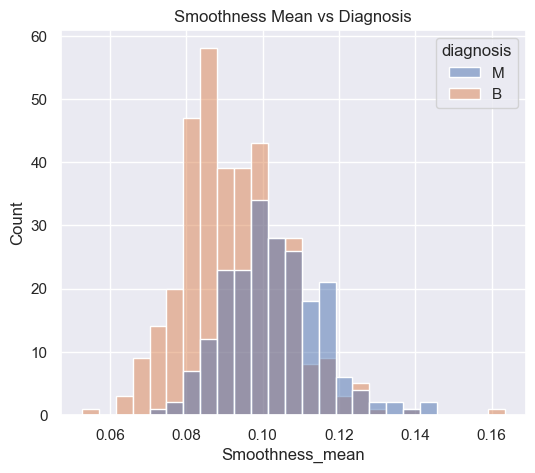

In [18]:
# distribution of diagnosis over smoothness mean
plt.figure(figsize=(6,5))
sns.histplot(data=breast_cancer, x='smoothness_mean', hue='diagnosis')
plt.title("Smoothness Mean vs Diagnosis")
plt.xlabel("Smoothness_mean")
plt.ylabel("Count")
plt.show()

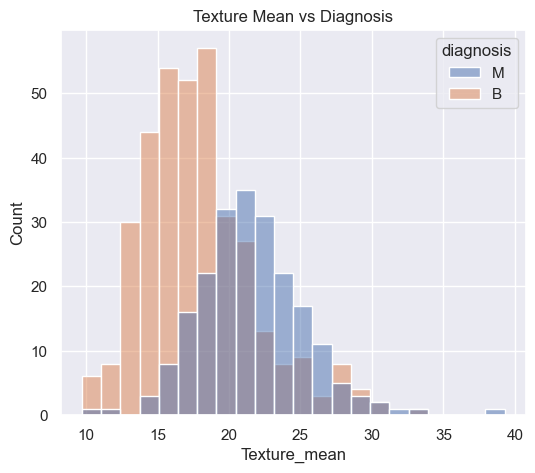

In [19]:
# distribution of diagnosis over texture mean
plt.figure(figsize=(6,5))
sns.histplot(data=breast_cancer, x='texture_mean', hue='diagnosis')
plt.title("Texture Mean vs Diagnosis")
plt.xlabel("Texture_mean")
plt.ylabel("Count")
plt.show()

###### analysis on contour shape

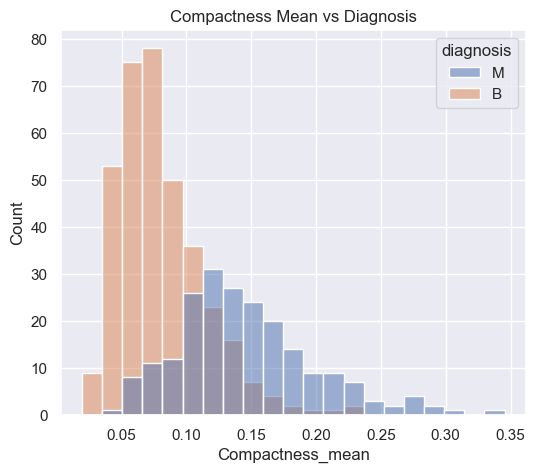

In [20]:
# distribution of diagnosis over compactness mean
plt.figure(figsize=(6,5))
sns.histplot(data=breast_cancer, x='compactness_mean', hue='diagnosis')
plt.title("Compactness Mean vs Diagnosis")
plt.xlabel("Compactness_mean")
plt.ylabel("Count")
plt.show()

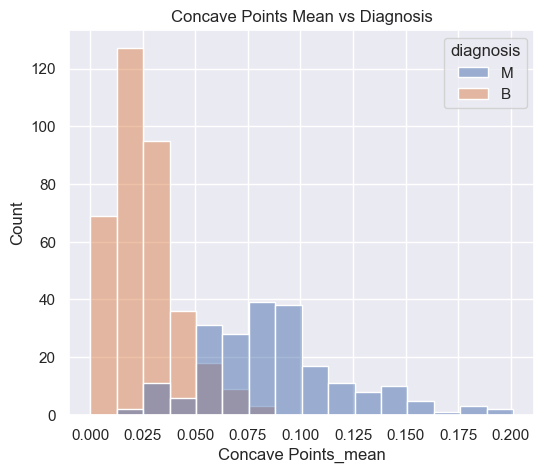

In [21]:
# distribution of diagnosis over concave points mean
plt.figure(figsize=(6,5))
sns.histplot(data=breast_cancer, x='concave points_mean', hue='diagnosis')
plt.title("Concave Points Mean vs Diagnosis")
plt.xlabel("Concave Points_mean")
plt.ylabel("Count")
plt.show()

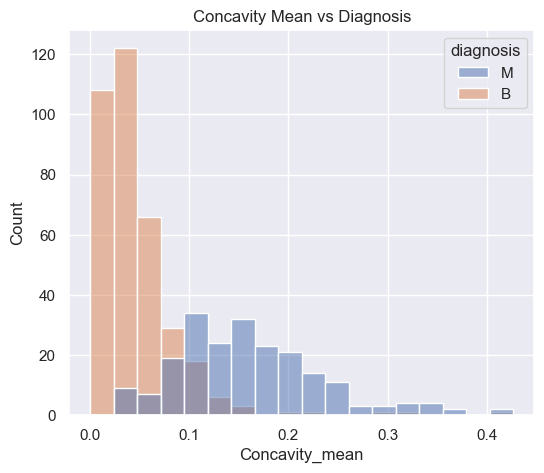

In [22]:
# distribution of diagnosis over concavity mean
plt.figure(figsize=(6,5))
sns.histplot(data=breast_cancer, x='concavity_mean', hue='diagnosis')
plt.title("Concavity Mean vs Diagnosis")
plt.xlabel("Concavity_mean")
plt.ylabel("Count")
plt.show()

In [23]:
# summarizing our visualization
breast_cancer.groupby('diagnosis').mean()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
B,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
M,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


In [24]:
# re-encoding 'diagnosis' column to perform prediction analysis
breast_cancer['diagnosis'] = breast_cancer['diagnosis'].replace({0:'M', 1:'B'})

### Model Preparation

In [25]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

#### Train Test Split

In [26]:
# split the dataset into features and target
X = breast_cancer.drop('diagnosis', axis=1)
y = breast_cancer['diagnosis']

In [27]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

###### using logistic regression

In [29]:
# logistic regression model
model = LogisticRegression()

# fit the model on the training data
model.fit(X_train_scaled, y_train)

# predict on the test data
y_pred = model.predict(X_test_scaled)

#### Model Evaluation

In [33]:
# evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# display the evaluation result
print(f"Accuracy: {accuracy*100:.4f}")
print("Classification REport: ")
print(classification_rep)

Accuracy: 98.2456
Classification REport: 
              precision    recall  f1-score   support

           B       0.97      1.00      0.99        71
           M       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



###### using support vector machines

In [31]:
# support vector machine model
model = SVC()

# fit the model on the training data
model.fit(X_train_scaled, y_train)

# predict on the test data
y_pred = model.predict(X_test_scaled)

#### Model Evaluation

In [32]:
# evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# display the evaluation result
print(f"Accuracy: {accuracy*100:.4f}")
print("Classification REport: ")
print(classification_rep)

Accuracy: 98.2456
Classification REport: 
              precision    recall  f1-score   support

           B       0.97      1.00      0.99        71
           M       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



Both models are performing highly with an accuracy score of 98.24